# Melspectrogram + CNN for underwater audio classification

## Set up the environment

In [18]:
import csv
import glob
import os
import warnings
import librosa
import librosa.display
import numpy as np
import numpy.matlib as mtlib
import keras
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit
from IPython.display import Audio
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.layers.convolutional import Convolution2D
from keras.layers.core import Activation

warnings.filterwarnings("ignore")
% matplotlib inline

print(os.getcwd())
os.chdir("/home/paul/AtelierML") # path to change if needed
os.getcwd()


/home/paul/AtelierML


'/home/paul/AtelierML'

## Preprocess the data

### Explore the data

Folder containing all the WAV files. Each file contains only one occurence of the two species.
The extraction of the labels for each file is performed and stored in a CSV file

In [3]:
wav_dir = 'allWavSamples' 
labels = []
filenames = []
for i, f in enumerate(glob.glob(os.getcwd() + os.sep + wav_dir + os.sep + '*.wav')):  # for each WAV file
    wavFile = f
    # Extract wav filename
    filename = wavFile.split(os.sep)[5]
    filenames.append(filename)
    labels.append(filename.split('.')[2])
with open('labelsTest.csv', 'w') as f:
        writer = csv.writer(f)
        writer.writerows(zip(filenames, labels))

In [4]:
np.unique(labels) # which class is in the dataset

array(['Bm', 'Eg'], dtype='<U2')

Audio sample to listen to

In [5]:
X, sample_rate = librosa.load(os.getcwd()
    + os.sep + 'allWavSamples' + os.sep + filenames[24], sr=2000)
print(filenames[24])
Audio(X, rate=sample_rate)

### Encode labels

In [6]:
le = preprocessing.LabelEncoder()
le.fit(labels)
encodedLabels = le.transform(labels)

### Extract features (melspectrograms)

In [7]:
samplingRate = 2000
nOccur = len(labels)
n_mfccs = 40
max_len = 43
dataMFCC = np.zeros((n_mfccs, max_len, nOccur))
labels2 = np.zeros(nOccur, dtype=np.uint8)
k = 0

Compute melspectrogram for each sample

In [8]:
for file, label in zip(filenames, encodedLabels):
        print(file)

        X, sample_rate = librosa.load(os.getcwd() + os.sep + 'allWavSamples' + os.sep + file, sr=samplingRate)

        melspectro = librosa.feature.melspectrogram(X, samplingRate, n_fft=4096, hop_length=2048, n_mels=n_mfccs)

        if melspectro.shape[1] < max_len:
            pad = np.zeros((melspectro.shape[0], max_len - melspectro.shape[1]))
            melspectro = np.hstack((melspectro, pad))
        elif melspectro.shape[1] > max_len:
            melspectro = melspectro[:, :max_len]

        dataMFCC[:, :, k] = melspectro
        labels2[k] = label
        k += 1

HAT_A_2012-10-24T08:33:31.7.Bm.poor.wav
WAT_HZ_2015-12-09T03:29:32.4.Bm.poor.wav
HAT_A_2012-10-22T09:44:05.7.Bm.poor.wav
WAT_BP_2016-10-03T06:43:50.1.Bm.good.wav
WAT_HZ_2015-12-09T11:23:45.0.Bm.good.wav
HAT_A_2012-10-24T13:10:24.5.Bm.poor.wav
WAT_BP_2016-10-02T01:36:17.2.Bm.poor.wav
WAT_BP_2016-10-03T00:42:38.0.Bm.good.wav
WAT_BP_2016-10-04T03:24:50.0.Bm.poor.wav
HAT_A_2012-10-24T18:38:03.9.Bm.poor.wav
HAT_A_2012-10-22T13:08:19.5.Bm.good.wav
WAT_BP_2016-10-04T01:08:15.8.Bm.poor.wav
WAT_HZ_2015-12-09T13:52:38.2.Bm.good.wav
WAT_BP_2016-10-03T22:30:45.1.Bm.good.wav
WAT_BP_2016-10-04T04:25:23.3.Bm.good.wav
WAT_BP_2016-10-03T21:53:54.9.Bm.good.wav
WAT_HZ_2016-02-17T02:39:26.3.Bm.good.wav
WAT_HZ_2015-12-09T11:27:13.8.Bm.good.wav
WAT_HZ_2015-12-09T10:34:49.9.Bm.good.wav
HAT_A_2012-10-24T05:08:29.6.Bm.poor.wav
WAT_BP_2016-10-04T06:32:37.3.Bm.poor.wav
WAT_BP_2016-10-02T07:24:22.0.Bm.poor.wav
WAT_BP_2016-10-04T00:25:30.3.Bm.poor.wav
WAT_BP_2016-10-04T09:22:05.6.Bm.good.wav
HAT_A_2012-10-24T19:10

WAT_BP_2016-10-04T01:48:07.2.Bm.poor.wav
WAT_HZ_2016-01-09T10:49:19.7.Bm.good.wav
HAT_A_2013-09-09T09:47:17.5.Bm.poor.wav
HAT_A_2012-10-23T03:03:41.0.Bm.poor.wav
WAT_BP_2016-10-03T12:27:41.5.Bm.good.wav
WAT_HZ_2015-12-09T12:48:25.1.Bm.good.wav
WAT_HZ_2015-12-09T11:21:57.8.Bm.good.wav
WAT_BP_2016-10-04T00:17:40.9.Bm.poor.wav
WAT_BP_2016-10-03T03:16:15.5.Bm.poor.wav
WAT_HZ_2016-02-17T01:09:56.3.Bm.good.wav
WAT_BP_2016-10-02T02:22:28.4.Bm.poor.wav
WAT_OC_2015-05-20T06:34:25.0.Eg.good.wav
HAT_A_2012-10-22T11:05:20.0.Bm.poor.wav
WAT_BP_2016-10-04T01:45:44.8.Bm.good.wav
WAT_HZ_2016-02-17T01:42:14.9.Bm.good.wav
WAT_BP_2016-10-03T21:24:22.8.Bm.good.wav
HAT_A_2012-10-25T00:29:34.6.Bm.poor.wav
WAT_BP_2016-10-03T06:59:17.6.Bm.poor.wav
WAT_HZ_2016-02-17T01:08:37.8.Bm.good.wav
WAT_BP_2016-10-04T06:16:11.1.Bm.good.wav
WAT_BP_2016-10-04T06:19:53.0.Bm.poor.wav
HAT_A_2012-10-21T18:19:07.0.Bm.good.wav
WAT_HZ_2016-02-17T05:26:38.3.Bm.good.wav
WAT_BP_2016-10-02T07:39:29.3.Bm.poor.wav
HAT_A_2012-10-22T03:3

WAT_HZ_2016-01-09T11:40:31.3.Bm.good.wav
WAT_BP_2016-10-02T04:03:03.5.Bm.good.wav
WAT_BP_2016-10-02T09:17:44.4.Bm.poor.wav
WAT_BP_2016-10-03T22:09:37.2.Bm.poor.wav
WAT_BP_2016-10-03T07:00:02.3.Bm.good.wav
WAT_BP_2016-10-02T02:22:44.2.Bm.poor.wav
HAT_A_2012-10-27T11:19:51.4.Bm.poor.wav
HAT_A_2012-10-21T09:44:35.9.Bm.poor.wav
WAT_BP_2016-10-02T05:36:06.8.Bm.poor.wav
WAT_HZ_2015-12-09T12:05:01.1.Bm.good.wav
WAT_BP_2016-10-02T06:47:25.1.Bm.poor.wav
WAT_BP_2016-10-03T06:36:26.5.Bm.good.wav
WAT_HZ_2015-12-09T05:46:37.0.Bm.good.wav
WAT_BP_2016-10-02T12:37:05.4.Bm.poor.wav
WAT_BP_2016-10-04T01:09:23.7.Bm.poor.wav
HAT_A_2012-10-25T09:13:11.8.Bm.poor.wav
WAT_BP_2016-10-02T03:26:11.9.Bm.poor.wav
WAT_BP_2016-10-04T01:44:28.3.Bm.good.wav
HAT_A_2012-10-27T02:49:22.7.Bm.poor.wav
WAT_HZ_2016-01-09T12:38:20.3.Bm.good.wav
WAT_BP_2016-10-04T02:11:03.7.Bm.good.wav
WAT_BP_2016-10-04T01:47:02.8.Bm.good.wav
WAT_BP_2016-10-02T05:38:38.0.Bm.poor.wav
WAT_BP_2016-10-02T05:07:50.2.Bm.poor.wav
WAT_HZ_2016-01-09T11

WAT_BP_2016-10-02T06:08:11.4.Bm.poor.wav
WAT_BP_2016-10-02T04:39:16.1.Bm.good.wav
HAT_A_2012-10-25T08:56:09.7.Bm.poor.wav
WAT_BP_2016-10-02T07:33:28.4.Bm.poor.wav
WAT_BP_2016-10-02T07:41:47.6.Bm.poor.wav
HAT_A_2012-10-21T22:37:45.0.Bm.poor.wav
WAT_HZ_2016-01-09T13:59:15.3.Bm.good.wav
WAT_HZ_2016-02-17T01:53:22.2.Bm.good.wav
HAT_A_2012-10-24T04:02:34.3.Bm.poor.wav
WAT_HZ_2016-02-17T00:03:24.3.Bm.good.wav
WAT_BP_2016-10-04T06:06:27.0.Bm.poor.wav
WAT_BP_2016-10-04T06:03:29.4.Bm.poor.wav
WAT_HZ_2016-02-17T01:12:21.4.Bm.good.wav
HAT_A_2012-10-22T06:20:29.0.Bm.poor.wav
HAT_A_2013-09-09T20:37:45.1.Bm.poor.wav
WAT_BP_2016-10-02T03:39:42.1.Bm.poor.wav
WAT_BP_2016-10-04T06:13:37.5.Bm.good.wav
WAT_HZ_2016-01-09T13:32:26.5.Bm.good.wav
WAT_BP_2016-10-03T06:35:20.9.Bm.poor.wav
HAT_A_2013-02-27T23:09:40.0.Eg.poor.wav
HAT_A_2012-10-25T02:12:48.9.Bm.poor.wav
HAT_A_2013-02-27T00:24:26.9.Eg.poor.wav
WAT_HZ_2015-12-09T12:06:19.9.Bm.good.wav
WAT_HZ_2016-02-17T23:28:09.3.Bm.good.wav
WAT_BP_2016-10-03T04:26:

WAT_BP_2016-10-04T02:27:44.6.Bm.good.wav
WAT_BP_2016-10-02T08:09:34.0.Bm.good.wav
HAT_A_2012-10-25T00:58:01.9.Bm.poor.wav
WAT_BP_2016-10-02T08:08:02.2.Bm.poor.wav
WAT_BP_2016-10-03T02:03:20.9.Bm.poor.wav
WAT_HZ_2016-02-17T01:05:57.0.Bm.good.wav
WAT_BP_2016-10-02T07:16:19.3.Bm.good.wav
WAT_BP_2016-10-03T06:47:20.5.Bm.good.wav
HAT_A_2013-09-09T10:32:10.2.Bm.poor.wav
WAT_BP_2016-10-03T07:13:32.6.Bm.good.wav
WAT_HZ_2016-02-17T03:39:57.9.Bm.poor.wav
WAT_OC_2015-05-20T08:10:18.3.Eg.poor.wav
WAT_BP_2016-10-03T12:01:24.1.Bm.good.wav
WAT_OC_2015-05-20T07:49:43.0.Eg.poor.wav
WAT_BP_2016-10-04T01:41:37.3.Bm.poor.wav
WAT_BP_2016-10-03T22:44:42.0.Bm.good.wav
WAT_BP_2016-10-04T00:21:31.5.Bm.poor.wav
WAT_BP_2016-10-03T22:00:12.2.Bm.good.wav
WAT_HZ_2015-12-09T13:23:01.3.Bm.good.wav
WAT_BP_2016-10-03T07:10:06.2.Bm.good.wav
WAT_HZ_2016-01-09T20:27:46.3.Bm.poor.wav
WAT_NC_2015-05-20T04:24:43.4.Eg.poor.wav
WAT_HZ_2016-01-09T09:30:40.4.Bm.good.wav
HAT_A_2013-09-09T09:39:46.8.Bm.poor.wav
WAT_BP_2016-10-02T0

WAT_BP_2016-10-03T03:18:37.5.Bm.poor.wav
WAT_BP_2016-10-02T06:00:04.4.Bm.poor.wav
HAT_A_2012-10-25T00:39:56.1.Bm.poor.wav
WAT_NC_2015-05-20T04:08:10.6.Eg.poor.wav
HAT_A_2012-10-23T01:09:12.5.Bm.good.wav
WAT_BP_2016-10-02T04:18:55.4.Bm.good.wav
WAT_BP_2016-10-04T01:18:34.5.Bm.poor.wav
WAT_HZ_2016-02-17T00:49:54.1.Bm.good.wav
WAT_NC_2015-05-20T03:53:16.1.Eg.poor.wav
HAT_A_2012-10-22T04:35:47.4.Bm.poor.wav
WAT_HZ_2015-12-09T06:06:14.3.Bm.good.wav
WAT_HZ_2016-02-17T01:54:36.5.Bm.good.wav
WAT_BP_2016-10-02T10:57:42.1.Bm.poor.wav
WAT_BP_2016-10-02T06:20:25.9.Bm.poor.wav
WAT_BP_2016-10-03T01:14:49.9.Bm.good.wav
WAT_HZ_2016-02-17T06:53:09.4.Bm.good.wav
WAT_BP_2016-10-04T00:08:55.6.Bm.poor.wav
HAT_A_2012-10-27T05:26:09.2.Bm.poor.wav
WAT_BP_2016-10-03T22:24:39.6.Bm.good.wav
WAT_HZ_2016-02-17T03:10:37.8.Bm.good.wav
WAT_BP_2016-10-03T22:23:21.0.Bm.good.wav
HAT_A_2012-10-27T10:09:11.6.Bm.poor.wav
WAT_BP_2016-10-03T03:05:03.2.Bm.poor.wav
WAT_HZ_2016-01-09T11:17:15.6.Bm.good.wav
WAT_HZ_2016-02-17T06:

WAT_BP_2016-10-03T03:22:30.0.Bm.good.wav
WAT_BP_2016-10-03T13:24:11.7.Bm.good.wav
WAT_BP_2016-10-04T00:30:19.1.Bm.poor.wav
WAT_BP_2016-10-02T03:56:08.0.Bm.good.wav
WAT_HZ_2016-01-09T08:42:03.8.Bm.good.wav
HAT_A_2012-10-22T03:27:53.5.Bm.poor.wav
WAT_BP_2016-10-03T22:21:01.0.Bm.good.wav
WAT_HZ_2016-02-17T00:57:41.3.Bm.good.wav
HAT_A_2013-09-09T11:19:22.9.Bm.poor.wav
WAT_HZ_2016-01-09T11:05:44.5.Bm.poor.wav
HAT_A_2012-10-27T04:50:20.2.Bm.poor.wav
HAT_A_2012-10-25T08:24:43.6.Bm.good.wav
WAT_BP_2016-10-02T08:24:04.3.Bm.poor.wav
WAT_OC_2015-05-20T06:31:17.4.Eg.good.wav
WAT_OC_2015-05-20T00:18:43.1.Eg.poor.wav
WAT_HZ_2016-01-09T11:33:16.4.Bm.good.wav
WAT_BP_2016-10-02T10:51:18.6.Bm.poor.wav
WAT_BP_2016-10-02T05:22:08.7.Bm.good.wav
WAT_OC_2015-05-20T06:25:04.7.Eg.good.wav
WAT_BP_2016-10-02T06:06:21.8.Bm.poor.wav
WAT_BP_2016-10-02T06:50:44.5.Bm.poor.wav
WAT_BP_2016-10-02T06:15:51.8.Bm.poor.wav
WAT_BP_2016-10-04T06:10:38.7.Bm.poor.wav
WAT_HZ_2016-02-17T03:26:50.1.Bm.good.wav
WAT_BP_2016-10-04T07

WAT_BP_2016-10-04T05:28:26.6.Bm.poor.wav
WAT_BP_2016-10-02T01:58:04.8.Bm.poor.wav
HAT_A_2012-10-24T09:25:23.6.Bm.poor.wav
WAT_HZ_2015-12-09T12:00:09.5.Bm.good.wav
WAT_BP_2016-10-02T05:25:55.2.Bm.poor.wav
WAT_HZ_2016-02-17T07:40:58.6.Bm.good.wav
WAT_HZ_2015-12-09T11:15:27.2.Bm.good.wav
WAT_BP_2016-10-04T00:57:56.5.Bm.poor.wav
WAT_BP_2016-10-04T09:38:39.4.Bm.poor.wav
HAT_A_2012-10-25T01:51:29.1.Bm.poor.wav
HAT_A_2012-10-27T04:48:59.6.Bm.poor.wav
WAT_BP_2016-10-02T02:19:53.4.Bm.poor.wav
WAT_HZ_2015-12-09T06:16:40.4.Bm.good.wav
WAT_OC_2015-05-20T06:23:15.0.Eg.good.wav
HAT_A_2012-10-25T01:12:37.3.Bm.poor.wav
HAT_A_2012-10-23T01:03:18.8.Bm.poor.wav
WAT_BP_2016-10-03T04:41:14.1.Bm.good.wav
WAT_BP_2016-10-04T09:58:19.1.Bm.good.wav
WAT_HZ_2016-02-17T00:22:40.5.Bm.good.wav
WAT_HZ_2015-12-09T11:44:51.5.Bm.good.wav
WAT_HZ_2016-02-17T05:07:26.5.Bm.poor.wav
HAT_A_2012-10-26T08:43:45.6.Bm.poor.wav
WAT_BP_2016-10-03T21:51:24.5.Bm.poor.wav
WAT_BP_2016-10-03T22:20:46.6.Bm.good.wav
WAT_BP_2016-10-02T04:1

HAT_A_2012-10-21T19:41:23.3.Bm.poor.wav
WAT_HZ_2016-02-17T03:12:43.1.Bm.good.wav
HAT_A_2012-10-25T11:44:25.8.Bm.poor.wav
HAT_A_2013-09-09T13:59:10.9.Bm.poor.wav
WAT_HZ_2015-12-09T10:32:39.5.Bm.good.wav
WAT_HZ_2016-02-17T02:09:00.6.Bm.good.wav
WAT_BP_2016-10-03T02:58:58.4.Bm.poor.wav
WAT_HZ_2016-02-17T00:33:21.1.Bm.good.wav
WAT_BP_2016-10-03T07:28:25.0.Bm.good.wav
WAT_BP_2016-10-03T06:57:50.9.Bm.good.wav
HAT_A_2012-10-21T18:43:32.1.Bm.poor.wav
HAT_A_2012-10-24T03:51:09.1.Bm.poor.wav
HAT_A_2012-10-21T05:42:18.8.Bm.poor.wav
WAT_BP_2016-10-03T03:37:23.7.Bm.good.wav
WAT_HZ_2016-02-17T03:18:32.7.Bm.good.wav
WAT_BP_2016-10-03T04:26:41.2.Bm.good.wav
WAT_HZ_2016-02-17T02:16:05.3.Bm.good.wav
WAT_BP_2016-10-03T16:44:22.1.Bm.poor.wav
HAT_A_2012-10-24T04:34:42.8.Bm.poor.wav
WAT_BP_2016-10-03T22:41:19.5.Bm.poor.wav
WAT_BP_2016-10-02T07:29:01.8.Bm.poor.wav
WAT_BP_2016-10-04T07:02:31.9.Bm.poor.wav
WAT_BP_2016-10-03T06:29:56.3.Bm.good.wav
WAT_OC_2015-05-20T06:56:48.9.Eg.good.wav
WAT_BP_2016-10-04T10:04

WAT_HZ_2015-12-09T12:58:54.1.Bm.good.wav
WAT_BP_2016-10-04T09:52:24.5.Bm.poor.wav
WAT_BP_2016-10-04T06:08:13.4.Bm.good.wav
WAT_OC_2015-05-20T06:11:32.3.Eg.good.wav
WAT_HZ_2015-12-09T11:43:50.0.Bm.good.wav
WAT_HZ_2016-02-17T00:43:54.6.Bm.good.wav
WAT_BP_2016-10-04T02:27:17.3.Bm.poor.wav
WAT_BP_2016-10-04T00:41:07.6.Bm.poor.wav
WAT_BP_2016-10-02T03:47:24.1.Bm.poor.wav
WAT_BP_2016-10-04T06:04:08.7.Bm.good.wav
WAT_BP_2016-10-03T06:49:34.9.Bm.poor.wav
WAT_BP_2016-10-02T07:49:05.4.Bm.poor.wav
HAT_A_2012-10-24T18:52:12.0.Bm.poor.wav
HAT_A_2013-09-09T09:51:54.9.Bm.poor.wav
HAT_A_2012-10-25T06:20:29.7.Bm.poor.wav
WAT_BP_2016-10-03T06:49:58.0.Bm.good.wav
WAT_HZ_2015-12-09T14:17:42.1.Bm.good.wav
WAT_OC_2015-05-20T08:01:26.6.Eg.poor.wav
WAT_OC_2015-05-20T01:19:34.4.Eg.poor.wav
HAT_A_2012-10-25T07:35:33.3.Bm.poor.wav
WAT_OC_2015-05-20T06:28:40.5.Eg.good.wav
WAT_BP_2016-10-03T06:51:04.6.Bm.good.wav
WAT_BP_2016-10-03T12:10:22.0.Bm.good.wav
WAT_BP_2016-10-03T13:16:23.4.Bm.poor.wav
HAT_A_2013-09-13T12:

WAT_HZ_2016-02-17T03:41:11.1.Bm.poor.wav
WAT_BP_2016-10-02T04:05:39.2.Bm.poor.wav
WAT_BP_2016-10-02T01:30:05.6.Bm.poor.wav
WAT_BP_2016-10-03T07:24:55.8.Bm.good.wav
WAT_BP_2016-10-02T07:46:44.1.Bm.poor.wav
WAT_HZ_2015-12-09T11:46:40.2.Bm.good.wav
HAT_A_2013-09-09T10:29:09.4.Bm.poor.wav
HAT_A_2012-10-24T14:57:04.4.Bm.poor.wav
WAT_BP_2016-10-02T04:04:20.1.Bm.good.wav
WAT_BP_2016-10-03T07:28:39.3.Bm.good.wav
WAT_BP_2016-10-02T08:31:16.4.Bm.poor.wav
WAT_BP_2016-10-04T00:24:24.1.Bm.poor.wav
WAT_HZ_2016-01-09T11:28:30.0.Bm.good.wav
WAT_BP_2016-10-03T03:14:56.1.Bm.poor.wav
WAT_HZ_2016-02-17T08:31:34.9.Bm.good.wav
WAT_BP_2016-10-04T01:40:17.3.Bm.poor.wav
WAT_HZ_2016-01-09T19:51:37.1.Bm.poor.wav
WAT_BP_2016-10-02T04:16:29.1.Bm.good.wav
HAT_A_2012-10-22T09:40:22.8.Bm.good.wav
WAT_HZ_2016-02-17T00:49:02.9.Bm.good.wav
WAT_OC_2015-05-20T01:19:20.0.Eg.poor.wav
HAT_A_2012-10-27T09:31:16.6.Bm.poor.wav
WAT_HZ_2015-12-09T10:20:20.3.Bm.good.wav
WAT_OC_2015-05-20T06:09:10.8.Eg.good.wav
WAT_HZ_2016-01-09T12

WAT_BP_2016-10-03T21:56:26.2.Bm.good.wav
HAT_A_2013-09-09T09:29:47.9.Bm.poor.wav
WAT_BP_2016-10-03T06:21:13.0.Bm.good.wav
WAT_BP_2016-10-02T07:04:03.9.Bm.poor.wav
WAT_BP_2016-10-02T04:23:19.1.Bm.good.wav
WAT_HZ_2016-02-17T01:43:28.5.Bm.good.wav
HAT_A_2013-02-27T00:54:16.2.Eg.poor.wav
WAT_BP_2016-10-04T02:34:57.4.Bm.poor.wav
HAT_A_2012-10-21T05:41:09.8.Bm.good.wav
WAT_HZ_2015-12-09T11:06:19.8.Bm.good.wav
WAT_HZ_2016-02-17T02:17:17.9.Bm.good.wav
WAT_HZ_2016-02-17T18:10:30.2.Bm.poor.wav
WAT_BP_2016-10-03T04:28:00.9.Bm.good.wav
WAT_OC_2015-05-20T06:25:57.8.Eg.good.wav
WAT_BP_2016-10-04T00:24:41.9.Bm.poor.wav
WAT_BP_2016-10-04T10:00:44.0.Bm.poor.wav
WAT_HZ_2016-01-09T14:13:51.2.Bm.good.wav
WAT_HZ_2016-02-17T02:44:40.3.Bm.good.wav
WAT_BP_2016-10-04T06:25:27.9.Bm.poor.wav
WAT_OC_2015-05-20T07:45:32.4.Eg.poor.wav
WAT_BP_2016-10-03T06:48:51.7.Bm.good.wav
WAT_BP_2016-10-04T06:27:51.9.Bm.poor.wav
WAT_HZ_2016-02-17T01:52:20.0.Bm.poor.wav
WAT_BP_2016-10-02T01:38:35.3.Bm.poor.wav
WAT_BP_2016-10-04T0

Save all the computed features and corresponding labels

In [9]:
fileMatFeats = 'dataMatTest1.npy'
fileLabels = 'labelsArrTest1.npy'
fileLabelEnco = 'labelEncoTest1.npy'

dataToStore = dataMFCC.swapaxes(0, 2).swapaxes(1, 2).reshape(-1, max_len * n_mfccs)
np.save(fileMatFeats, dataToStore)
np.save(fileLabels, labels2)
np.save(fileLabelEnco, le)

Load features and labels

In [10]:
melspectros = np.load(fileMatFeats)
labels = np.load(fileLabels)
le = np.load(fileLabelEnco)

scaler = StandardScaler()
concatMelspectros = scaler.fit_transform(melspectros)
del melspectros

## Train / Test a network

### Set up cross-validation

Split data in train/test datasets for cross-validation.
Other methods in Python exists (train_test_split, ShufffleSplit, ...) but this one 
preserves the percentage of samples for each class. However, the datasets are still really unbalanced...

In [11]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
sss.get_n_splits(concatMelspectros, labels)
numClasses = len(np.unique(labels))

### Metrics

In [12]:
def print_model_metrics(model, x_test, y_test):
    loss, accuracy = model.evaluate(x=x_test, y=y_test)
    print("\n model test loss is " + str(loss) + " accuracy is " + str(accuracy))

    y_softmax = model.predict(x_test)  # this is an n x class matrix of probabilities
    y_hat = y_softmax.argmax(axis=-1)  # this will be the class number.
    test_y = y_test.argmax(axis=-1)  # our test data is also categorical
    print(classification_report(test_y, y_hat))
    print(confusion_matrix(test_y, y_hat))
    print("\n Accuracy score is:" + str(accuracy_score(test_y, y_hat)))


### Train / Test a network

#### Notions

##### Convolution

Convolution filters are used in the initial layers to extract high level features from an image. It applies a matrix known as the kernel to the input tensor to produce a set of matrices known as the feature maps.

![](convolutionEq.png)

Example for image convolution

![](convoluCustom.png)

##### Relu Function

Text(0.5,1,'ReLU function: ReLU(x)=max(0,x)')

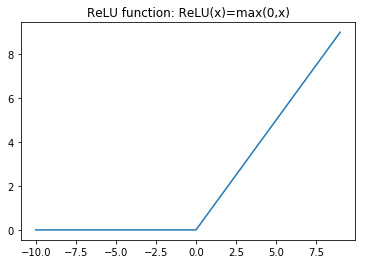

In [13]:
xax = np.array([i for i in range(-10, 10)])
ax = plt.plot([i for i in range(-10, 10)], np.maximum(0, xax))
plt.title('ReLU function: ReLU(x)=max(0,x)')

 One benefit from ReLU: it computes faster.

##### Softmax output layer

In [14]:
def softmax(x):
    """Compute softmax values for each sets of scores in x.
        https://stackoverflow.com/questions/34968722/how-to-implement-the-softmax-function-in-python
    """
    return np.exp(x) / np.sum(np.exp(x), axis=0)

Let's take an example of what softmax function does. It puts a stack of numbers into a set of probability scores that all sum up to one. The index with the higher value is our predicted class. 

In [15]:
outputFC = [1, 10, 4, 5, 8, 3]
softmax(outputFC)

array([1.07726235e-04, 8.72914725e-01, 2.16373927e-03, 5.88165315e-03,
       1.18136162e-01, 7.95995195e-04])

##### Batch size

This is the number of samples (here images) per execution loop. Limited by te available memory. Generally, smaller batch size are preferred

##### Epoch

This is the number of iterations on the train / test sets.

In [16]:
j = 0
for train_index, test_index in sss.split(concatMelspectros, labels):
    print('\nFold ', j)
    # Split in train / test sets for the ith fold
    X_train, X_test = concatMelspectros[train_index], concatMelspectros[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    
    # Reshape all feature vectors in tensors to feed the network
    x_train = np.reshape(X_train, (len(X_train), n_mfccs, max_len,1))
    x_test = np.reshape(X_test, (len(X_test), n_mfccs, max_len,1))

    # Convert labels to categorical ones ( binary class matrix )
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

    ## Build network
    model = Sequential()
    # 1st block 
    model.add(Convolution2D(filters=8, kernel_size=7,
                    input_shape=x_train.shape[1:])) # -> see Notions.Convolution
    convout1 = Activation('relu') # -> see Notions.ReLU
    model.add(convout1)
    # 2nd block
    model.add(Flatten())
    model.add(Dense(200))
    fcout2 = Activation('relu')
    model.add(fcout2)
    # Decision
    model.add(Dense(numClasses))
    outputDeci = Activation('softmax') # -> see Notions.Softmax
    model.add(outputDeci)
    # Optimizer
    opt = keras.optimizers.SGD(lr=0.5)
    # Generate the network
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=["accuracy"])

    # Train model
    model.fit(x_train, y_train,
              batch_size=32,
              epochs=5,
              shuffle=True,
              verbose=2,
              validation_data=(x_test, y_test))
    # Test model of this fold and print loss and accuracy on test set
    print_model_metrics(model, x_test, y_test)
    j += 1


Fold  0
Train on 1909 samples, validate on 478 samples
Epoch 1/5
 - 9s - loss: 0.3435 - acc: 0.9099 - val_loss: 0.2475 - val_acc: 0.9142
Epoch 2/5
 - 8s - loss: 0.2289 - acc: 0.9188 - val_loss: 0.2051 - val_acc: 0.9247
Epoch 3/5
 - 7s - loss: 0.4170 - acc: 0.9455 - val_loss: 1.3488 - val_acc: 0.9163
Epoch 4/5
 - 7s - loss: 1.3765 - acc: 0.9146 - val_loss: 1.3825 - val_acc: 0.9142
Epoch 5/5
 - 7s - loss: 1.3762 - acc: 0.9146 - val_loss: 1.3825 - val_acc: 0.9142
478/478 [==============================] - 1s 2ms/step

 model test loss is 1.382514472785854 accuracy is 0.914225941671986
             precision    recall  f1-score   support

          0       0.91      1.00      0.96       437
          1       0.00      0.00      0.00        41

avg / total       0.84      0.91      0.87       478

[[437   0]
 [ 41   0]]

 Accuracy score is:0.9142259414225942

Fold  1
Train on 1909 samples, validate on 478 samples
Epoch 1/5
 - 8s - loss: 0.1996 - acc: 0.9272 - val_loss: 0.0679 - val_acc: 0.

### Explore the last created network

In [17]:
# Print the structure of the network
model.summary()
# Nber of params conv2d -> (7 * 7 * 1 + 1) * 8 = 400
# Nber of params dense -> 10064*200 + 200 = 2013000
# Nber of params dense2 -> 200 * 2 + 2 = 402

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 34, 37, 8)         400       
_________________________________________________________________
activation_13 (Activation)   (None, 34, 37, 8)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 10064)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 200)               2013000   
_________________________________________________________________
activation_14 (Activation)   (None, 200)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 402       
_________________________________________________________________
activation_15 (Activation)   (None, 2)                 0         
Total para